In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [14]:
def clean_data_before_grouping(df):
    # Select and clean relevant columns, including the replicate column
    df = df[['sub_task', 'model', 'k', 'score', 'value', 'replicate']]
    df['model'] = df['model'].str.split('--clmbr_train').str[0]
    
    # Filter for AUROC scores
    df = df[(df['k'] == -1) & (df['score'] == 'auroc')]
    
    # Extract architecture and context length
    df['architecture'] = df['model'].apply(lambda x: x.split('-')[0])
    
    # Exclude BERT from the data
    df = df[df['architecture'] != 'bert']
    
    # Extract context length safely and ensure it's an integer
    df['context_length'] = df['model'].apply(lambda x: int(x.split('-')[2]) if len(x.split('-')) > 2 and x.split('-')[2].isdigit() else None)
    
    # Filter out rows related to GPT vocab size variations
    df = df[~df['model'].str.contains('--clmbr-')]
    
    # Return the cleaned data before grouping
    return df
    
# Assuming you load your data from a CSV file
df = pd.read_csv("/share/pi/nigam/migufuen/ehrshot-benchmark/EHRSHOT_ASSETS/results_ehrshot/guo_los/all_results.csv")

# Get the cleaned data before grouping
cleaned_data = clean_data_before_grouping(df)

# Display the cleaned data to inspect
print("Cleaned Data Before Grouping:")
print(cleaned_data.head())  # Display the first few rows


Cleaned Data Before Grouping:
   sub_task                 model  k  score     value  replicate architecture  \
30  guo_los  mamba-tiny-16384-max -1  auroc  0.838881          4        mamba   
33  guo_los  mamba-tiny-16384-max -1  auroc  0.838881          3        mamba   
36  guo_los  mamba-tiny-16384-max -1  auroc  0.838881          2        mamba   
39  guo_los  mamba-tiny-16384-max -1  auroc  0.838881          1        mamba   
42  guo_los  mamba-tiny-16384-max -1  auroc  0.838881          0        mamba   

    context_length  
30           16384  
33           16384  
36           16384  
39           16384  
42           16384  


/tmp/ipykernel_906989/1517273477.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model'] = df['model'].str.split('--clmbr_train').str[0]


In [34]:
cleaned_data

,sub_task,model,k,score,value,replicate,architecture,context_length
210,guo_los,llama-base-4096,-1,auroc,0.810027,4,llama,4096
213,guo_los,llama-base-4096,-1,auroc,0.810027,3,llama,4096
216,guo_los,llama-base-4096,-1,auroc,0.810027,2,llama,4096
219,guo_los,llama-base-4096,-1,auroc,0.810027,1,llama,4096
222,guo_los,llama-base-4096,-1,auroc,0.810027,0,llama,4096
...,...,...,...,...,...,...,...,...
1191,guo_los,hyena-large-1024,-1,auroc,0.808156,4,hyena,1024
1194,guo_los,hyena-large-1024,-1,auroc,0.808156,3,hyena,1024
1197,guo_los,hyena-large-1024,-1,auroc,0.808156,2,hyena,1024
1200,guo_los,hyena-large-1024,-1,auroc,0.808156,1,hyena,1024


### Plot and CSV for different model architectures and context length (non-chexpert)

Processing task: new_hypertension
           sub_task                                              model  \
0  new_hypertension                                     gpt2-base-1024   
1  new_hypertension  gpt2-base-1024--cehr_train-tokens-total_nonPAD...   
2  new_hypertension  gpt2-base-1024--clmbr_nbins_0_train-tokens-tot...   
3  new_hypertension                                     gpt2-base-2048   
4  new_hypertension                                     gpt2-base-4096   

  architecture  context_length  value_mean  lower_bound  upper_bound  \
0         gpt2            1024    0.691154     0.631999     0.745638   
1         gpt2            1024    0.688058     0.627082     0.742955   
2         gpt2            1024    0.700643     0.637171     0.755555   
3         gpt2            2048    0.714051     0.658216     0.766763   
4         gpt2            4096    0.721966     0.661732     0.773247   

      task_name  
0  Hypertension  
1  Hypertension  
2  Hypertension  
3  Hypertension 

/tmp/ipykernel_906989/2211692676.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model'] = df['model'].str.split('--clmbr_train').str[0]
/tmp/ipykernel_906989/2211692676.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model'] = df['model'].str.split('--clmbr_train').str[0]
/tmp/ipykernel_906989/2211692676.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

           sub_task                                              model  \
0  new_hypertension                                     gpt2-base-1024   
1  new_hypertension  gpt2-base-1024--cehr_train-tokens-total_nonPAD...   
2  new_hypertension  gpt2-base-1024--clmbr_nbins_0_train-tokens-tot...   
3  new_hypertension                                     gpt2-base-2048   
4  new_hypertension                                     gpt2-base-4096   

  architecture  context_length  value_mean  lower_bound  upper_bound  \
0         gpt2            1024    0.691154     0.631999     0.745638   
1         gpt2            1024    0.688058     0.627082     0.742955   
2         gpt2            1024    0.700643     0.637171     0.755555   
3         gpt2            2048    0.714051     0.658216     0.766763   
4         gpt2            4096    0.721966     0.661732     0.773247   

      task_name  
0  Hypertension  
1  Hypertension  
2  Hypertension  
3  Hypertension  
4  Hypertension  
Processing tas

/tmp/ipykernel_906989/2211692676.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model'] = df['model'].str.split('--clmbr_train').str[0]
/tmp/ipykernel_906989/2211692676.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model'] = df['model'].str.split('--clmbr_train').str[0]
/tmp/ipykernel_906989/2211692676.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

           sub_task                                              model  \
0  new_hypertension                                     gpt2-base-1024   
1  new_hypertension  gpt2-base-1024--cehr_train-tokens-total_nonPAD...   
2  new_hypertension  gpt2-base-1024--clmbr_nbins_0_train-tokens-tot...   
3  new_hypertension                                     gpt2-base-2048   
4  new_hypertension                                     gpt2-base-4096   

  architecture  context_length  value_mean  lower_bound  upper_bound  \
0         gpt2            1024    0.691154     0.631999     0.745638   
1         gpt2            1024    0.688058     0.627082     0.742955   
2         gpt2            1024    0.700643     0.637171     0.755555   
3         gpt2            2048    0.714051     0.658216     0.766763   
4         gpt2            4096    0.721966     0.661732     0.773247   

      task_name  
0  Hypertension  
1  Hypertension  
2  Hypertension  
3  Hypertension  
4  Hypertension  
Processing tas

/tmp/ipykernel_906989/2211692676.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model'] = df['model'].str.split('--clmbr_train').str[0]
/tmp/ipykernel_906989/2211692676.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model'] = df['model'].str.split('--clmbr_train').str[0]
/tmp/ipykernel_906989/2211692676.py:121: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

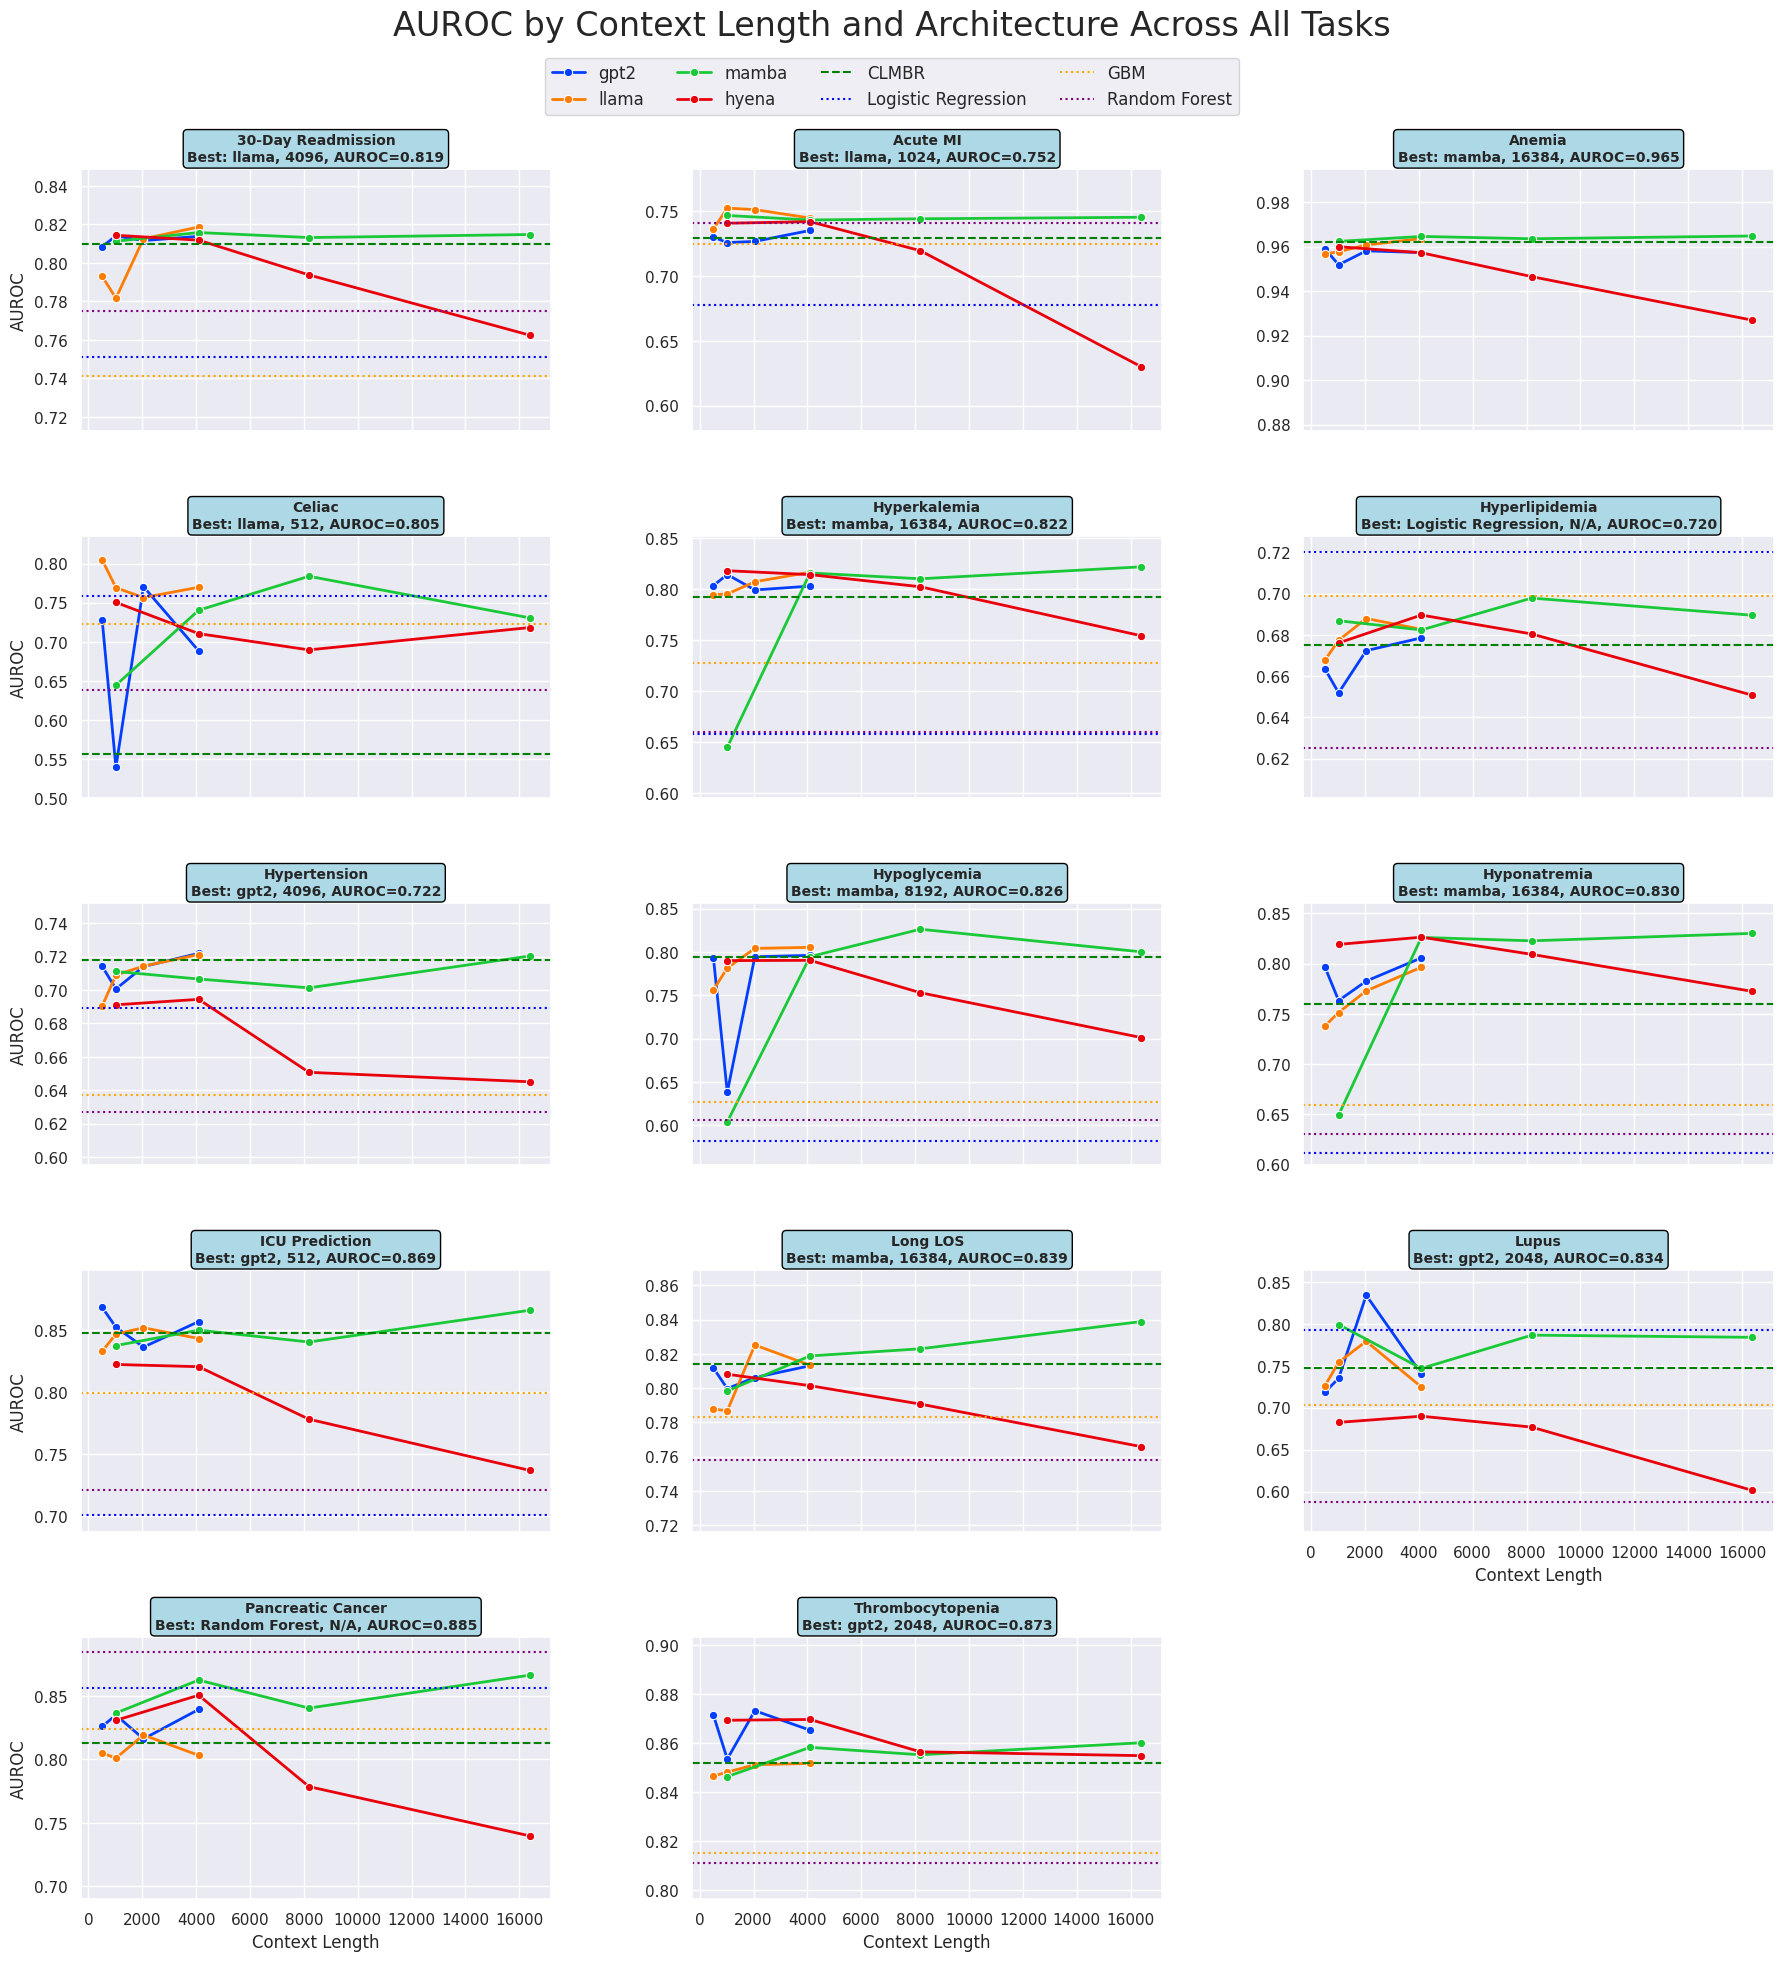


AUROC Summary Table saved to auroc_summary_table_context_length_architectire.csv


In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy.stats as stats


# Dictionary mapping folder names to actual task names
folder_to_name_mapping = {
    'guo_los': 'Long LOS',
    'guo_icu': 'ICU Prediction',
    'guo_readmission': '30-Day Readmission',
    'lab_anemia': 'Anemia',
    'lab_hyperkalemia': 'Hyperkalemia',
    'lab_hypoglycemia': 'Hypoglycemia',
    'lab_hyponatremia': 'Hyponatremia',
    'lab_thrombocytopenia': 'Thrombocytopenia',
    'new_acutemi': 'Acute MI',
    'new_celiac': 'Celiac',
    'new_hyperlipidemia': 'Hyperlipidemia',
    'new_hypertension': 'Hypertension',
    'new_lupus': 'Lupus',
    'new_pancan': 'Pancreatic Cancer'
}

# Dictionary mapping task names to their CLMBR and Logistic Regression AUROCs
# Updated dictionary with max(Logistic Regression, GBM, Random Forest) as baseline
baseline_and_sota = {
    'ICU Prediction': {
        'CLMBR': 0.848,
        'Logistic Regression': 0.701,
        'GBM': 0.799,
        'Random Forest': 0.721
    },
    'Long LOS': {
        'CLMBR': 0.814,
        'Logistic Regression': 0.704,
        'GBM': 0.783,
        'Random Forest': 0.758
    },
    '30-Day Readmission': {
        'CLMBR': 0.810,
        'Logistic Regression': 0.751,
        'GBM': 0.741,
        'Random Forest': 0.775
    },
    'Anemia': {
        'CLMBR': 0.962,
        'Logistic Regression': 0.739,
        'GBM': 0.814,
        'Random Forest': 0.799
    },
    'Hyponatremia': {
        'CLMBR': 0.760,
        'Logistic Regression': 0.612,
        'GBM': 0.659,
        'Random Forest': 0.631
    },
    'Thrombocytopenia': {
        'CLMBR': 0.852,
        'Logistic Regression': 0.753,
        'GBM': 0.815,
        'Random Forest': 0.811
    },
    'Hyperkalemia': {
        'CLMBR': 0.792,
        'Logistic Regression': 0.658,
        'GBM': 0.727,
        'Random Forest': 0.66
    },
    'Hypoglycemia': {
        'CLMBR': 0.794,
        'Logistic Regression': 0.582,
        'GBM': 0.627,
        'Random Forest': 0.606
    },
    'Acute MI': {
        'CLMBR': 0.729,
        'Logistic Regression': 0.678,
        'GBM': 0.725,
        'Random Forest': 0.741
    },
    'Lupus': {
        'CLMBR': 0.747,
        'Logistic Regression': 0.793,
        'GBM': 0.703,
        'Random Forest': 0.587
    },
    'Hyperlipidemia': {
        'CLMBR': 0.675,
        'Logistic Regression': 0.720,
        'GBM': 0.699,
        'Random Forest': 0.625
    },
    'Hypertension': {
        'CLMBR': 0.718,
        'Logistic Regression': 0.689,
        'GBM': 0.637,
        'Random Forest': 0.627
    },
    'Celiac': {
        'CLMBR': 0.557,
        'Logistic Regression': 0.758,
        'GBM': 0.723,
        'Random Forest': 0.639
    },
    'Pancreatic Cancer': {
        'CLMBR': 0.813,
        'Logistic Regression': 0.856,
        'GBM': 0.824,
        'Random Forest': 0.885
    }
}



# Function to clean and extract relevant information from the CSV
def clean_and_extract(df):
    # Select and clean relevant columns, including the replicate column and bounds
    df = df[['sub_task', 'model', 'k', 'score', 'value', 'replicate', 'lower', 'upper']]
    df['model'] = df['model'].str.split('--clmbr_train').str[0]
    
    # Filter for AUROC scores
    df = df[(df['k'] == -1) & (df['score'] == 'auroc')]
    
    # Extract architecture and context length
    df['architecture'] = df['model'].apply(lambda x: x.split('-')[0])
    
    # Exclude BERT from the data
    df = df[df['architecture'] != 'bert']
    
    # Extract context length safely and ensure it's an integer
    df['context_length'] = df['model'].apply(lambda x: int(x.split('-')[2]) if len(x.split('-')) > 2 and x.split('-')[2].isdigit() else None)
    
    # Filter out rows related to GPT vocab size variations
    df = df[~df['model'].str.contains('--clmbr-')]
    
    # Group by task, model, architecture, context length, and calculate mean and bounds for replicates
    df_grouped = df.groupby(['sub_task', 'model', 'architecture', 'context_length']).agg(
        value_mean=('value', 'mean'),
        lower_bound=('lower', 'mean'),
        upper_bound=('upper', 'mean')
    ).reset_index()
    
    return df_grouped


# Function to process all tasks and return the combined summary
def process_all_tasks_for_plotting():
    # current_dir = os.getcwd()
    # ehrshot_dir = os.path.join(current_dir, 'ehrshot')  # Point to the 'ehrshot' directory
    ehrshot_dir = '/share/pi/nigam/migufuen/ehrshot-benchmark/EHRSHOT_ASSETS/results_ehrshot'  # Point to the 'ehrshot' directory
    combined_summary = pd.DataFrame()
    
    for task_name in os.listdir(ehrshot_dir):
        task_path = os.path.join(ehrshot_dir, task_name)
        if os.path.isdir(task_path) and task_name != 'chexpert':  # Exclude "chexpert"
            try:
                print(f"Processing task: {task_name}")
                # Read and clean data
                input_file = os.path.join(task_path, 'all_results.csv')
                df = pd.read_csv(input_file)
                df_cleaned = clean_and_extract(df)
                
                # Map the task name to a human-readable name
                df_cleaned['task_name'] = folder_to_name_mapping.get(task_name, task_name)
                
                # Combine with the overall summary
                combined_summary = pd.concat([combined_summary, df_cleaned], ignore_index=True)
                print(combined_summary.head())  # Debug: Inspect the first few rows
                
            except Exception as e:
                print(f"Failed to process task {task_name}: {e}")
    
    return combined_summary

# Merge the baseline and state-of-the-art AUROCs into the combined summary
def merge_baseline_sota(df, baseline_and_sota):
    # Create lists to store each baseline model's AUROC
    logistic_auroc_list = []
    gbm_auroc_list = []
    rf_auroc_list = []
    clmbr_auroc_list = []

    # Iterate over each task in the DataFrame
    for task_name in df['task_name'].unique():
        if task_name in baseline_and_sota:
            logistic_auroc = baseline_and_sota[task_name].get('Logistic Regression')
            gbm_auroc = baseline_and_sota[task_name].get('GBM')
            rf_auroc = baseline_and_sota[task_name].get('Random Forest')
            clmbr_auroc = baseline_and_sota[task_name].get('CLMBR')
        else:
            logistic_auroc, gbm_auroc, rf_auroc, clmbr_auroc = None, None, None, None
        
        logistic_auroc_list.extend([logistic_auroc] * len(df[df['task_name'] == task_name]))
        gbm_auroc_list.extend([gbm_auroc] * len(df[df['task_name'] == task_name]))
        rf_auroc_list.extend([rf_auroc] * len(df[df['task_name'] == task_name]))
        clmbr_auroc_list.extend([clmbr_auroc] * len(df[df['task_name'] == task_name]))

    # Add these lists as columns to the DataFrame
    df['Logistic_AUROC'] = logistic_auroc_list
    df['GBM_AUROC'] = gbm_auroc_list
    df['Random_Forest_AUROC'] = rf_auroc_list
    df['CLMBR_AUROC'] = clmbr_auroc_list
    
    return df
    
    # Function to plot all tasks in one frame
def plot_all_tasks_in_one_frame(combined_summary, save_path):
    # Set the Seaborn style for a dark grid background
    sns.set(style="darkgrid")
    
    # Sort context lengths uniformly
    combined_summary = combined_summary.sort_values('context_length')
    
    # Ensure all tasks have the same context lengths by adding missing ones with NaN
    context_lengths = combined_summary['context_length'].unique()
    architectures = combined_summary['architecture'].unique()
    
    # Reindex for each task to ensure consistency in context lengths
    reindexed_data = []
    for task_name, task_data in combined_summary.groupby('task_name'):
        task_data = task_data.drop_duplicates(subset=['context_length', 'architecture'])
        task_data = task_data.set_index(['context_length', 'architecture']).reindex(
            pd.MultiIndex.from_product([context_lengths, architectures], names=['context_length', 'architecture']),
            fill_value=np.nan
        ).reset_index()
        task_data['task_name'] = task_name
        reindexed_data.append(task_data)
    
    combined_summary = pd.concat(reindexed_data, ignore_index=True)
    
    # Facet grid with one plot per task
    g = sns.FacetGrid(combined_summary, col="task_name", col_wrap=3, height=4, aspect=1.5, sharey=False, sharex=True, despine=False)
    
    # Plotting the line plots with architecture as hue
    g.map(sns.lineplot, "context_length", "value_mean", "architecture", marker='o', errorbar=None, palette="bright", linewidth=2)
    
    # Adjust the y-axis for each subplot individually
    for ax, (task_name, task_data) in zip(g.axes.flat, combined_summary.groupby('task_name')):
        y_min = task_data['value_mean'].min()
        y_max = task_data['value_mean'].max()
        
        # Adjust the axis limits dynamically
        ax.set_ylim([max(0.5, y_min - 0.05), min(1.0, y_max + 0.03)])
        
        # Find the row with the highest AUROC from the models
        best_row = task_data.loc[task_data['value_mean'].idxmax()]
        best_architecture = best_row['architecture']
        best_context_length = best_row['context_length']
        best_auroc = best_row['value_mean']
        
        # Get the baseline and state of the art AUROCs
        if task_name in baseline_and_sota:
            logistic_auroc = baseline_and_sota[task_name]['Logistic Regression']
            gbm_auroc = baseline_and_sota[task_name]['GBM']
            rf_auroc = baseline_and_sota[task_name]['Random Forest']
            clmbr_auroc = baseline_and_sota[task_name]['CLMBR']
            
            # Determine the best overall model (max of all baselines and CLMBR)
            baseline_max_auroc = max(logistic_auroc, gbm_auroc, rf_auroc, clmbr_auroc)
            if best_auroc < baseline_max_auroc:
                if baseline_max_auroc == clmbr_auroc:
                    best_architecture = 'CLMBR'
                    best_auroc = clmbr_auroc
                elif baseline_max_auroc == logistic_auroc:
                    best_architecture = 'Logistic Regression'
                    best_auroc = logistic_auroc
                elif baseline_max_auroc == gbm_auroc:
                    best_architecture = 'GBM'
                    best_auroc = gbm_auroc
                else:
                    best_architecture = 'Random Forest'
                    best_auroc = rf_auroc
                best_context_length = 'N/A'  # Baseline models and CLMBR are not dependent on context length
            
            # Plot CLMBR (State of the Art) as a horizontal dotted line
            ax.axhline(y=clmbr_auroc, color='green', linestyle='--', linewidth=1.5, label='CLMBR')
            
            # Plot the baseline models as horizontal dotted lines
            ax.axhline(y=logistic_auroc, color='blue', linestyle=':', linewidth=1.5, label='Logistic Regression')
            ax.axhline(y=gbm_auroc, color='orange', linestyle=':', linewidth=1.5, label='GBM')
            ax.axhline(y=rf_auroc, color='purple', linestyle=':', linewidth=1.5, label='Random Forest')
                
        ax.set_title(
            f"{task_name}\nBest: {best_architecture}, {best_context_length}, AUROC={best_auroc:.3f}",
            fontsize=10,
            fontweight='bold',
            bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=0.3')
        )
    
    # Set axis labels
    g.set_axis_labels("Context Length", "AUROC")
    
    # Adjust layout to fit the title and increase spacing between subplots
    plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.3)
    g.fig.suptitle('AUROC by Context Length and Architecture Across All Tasks', fontsize=24)
    
    # Add the legend manually for the baseline and state of the art
    handles, labels = ax.get_legend_handles_labels()
    g.fig.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, 0.96), ncol=4, fontsize=12)
    
    # Save the figure
    g.savefig(save_path)
    
    # Show the plot
    plt.show()

    # Merge the baseline and state-of-the-art AUROCs into the combined summary
    combined_summary_sorted = merge_baseline_sota(combined_summary, baseline_and_sota)

    # Remove rows with any NaNs
    combined_summary_sorted = combined_summary_sorted.dropna()

    # Save the contents of the plots as a CSV file for direct comparison
    output_csv_path = "auroc_summary_table_context_length_architectire.csv"
    combined_summary_sorted = combined_summary_sorted.sort_values(by=['task_name', 'value_mean'], ascending=[True, False])
    combined_summary_sorted[['task_name', 'model', 'value_mean', 'lower_bound', 'upper_bound', 'Logistic_AUROC', 'GBM_AUROC', 'Random_Forest_AUROC', 'CLMBR_AUROC']].to_csv(output_csv_path, index=False)
    print(f"\nAUROC Summary Table saved to {output_csv_path}")

# First, process all tasks and get the combined summary
combined_summary = process_all_tasks_for_plotting()

# Then, plot all tasks in one frame and save the figure
plot_all_tasks_in_one_frame(combined_summary, "auroc_by_context_length_and_architecture_fixed.png")
